In [139]:
import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

In [140]:
dataset = pd.read_csv('Data/new_churn_data.csv')

In [141]:
# Data Preparation

In [142]:
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [143]:
# One-Hot Encoding

In [144]:
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [145]:
# Need to be careful with dummy variables trap 
# Excluding correlated columns

In [146]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [147]:
# Splitting the dtaset into the Training and Test Set

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['churn']),
                                                   dataset['churn'],
                                                   test_size = 0.2,
                                                   random_state = 0)

In [150]:
# Balancing Training Set

In [151]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [152]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [153]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

In [154]:
random.seed(0)

In [155]:
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

In [156]:
X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [157]:
# Feature Scaling

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [160]:
# Model Building

In [161]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [162]:
# Predicting the test

In [163]:
y_pred = classifier.predict(X_test)

In [164]:
# Evaluating Results

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [166]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1602, 1564],
       [ 548, 1686]])

In [167]:
accuracy_score(y_test, y_pred)

0.6088888888888889

In [168]:
precision_score(y_test, y_pred) # TP/ TP + FP

0.5187692307692308

In [169]:
recall_score(y_test, y_pred) # TP/ TP + FN

0.7547000895255148

In [170]:
f1_score(y_test, y_pred)

0.6148796498905907

Test Data Accuracy: 0.6089


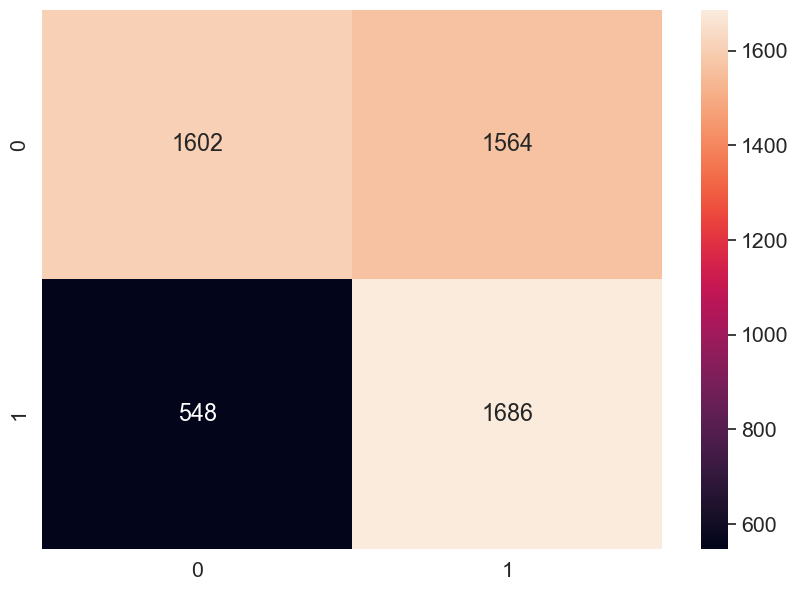

In [171]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [172]:
# K-Fold Cross Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y = y_train, 
                            cv = 10)

In [175]:
accuracies

array([0.6442953 , 0.64765101, 0.66331096, 0.6442953 , 0.63646532,
       0.6549217 , 0.62807606, 0.63758389, 0.63870246, 0.64261745])

In [176]:
# Analyzing Coefficients

In [177]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
           axis = 1)

,features,coef
0,age,-0.149566
1,deposits,0.488622
2,withdrawal,0.040400
3,purchases_partners,-0.726484
4,purchases,-0.632258
5,cc_taken,0.062730
6,cc_recommended,0.085880
7,cc_disliked,-0.008496
8,cc_liked,0.007193
9,cc_application_begin,0.005236


In [178]:
# Feature Selection

In [179]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [180]:
# Test Model

In [181]:
classifier = LogisticRegression()
rfe = RFE(classifier,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [182]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False])

In [183]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 16, 17, 18, 11,  1,  1, 22,  1,  1,  1,
        1,  1,  1,  2,  1, 10,  6,  1,  4,  7,  5,  1,  1, 21, 14, 12, 19,
       15,  9,  8, 20,  3,  1, 13])

In [184]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'reward_rate', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Taurus'],
      dtype='object')

In [185]:
# Model Fit and Evaluation with RFE

In [186]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [187]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [188]:
# Evaluating Results
cm = confusion_matrix(y_test, y_pred)

In [189]:
accuracy_score(y_test, y_pred)

0.6066666666666667

In [190]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.5168298653610771

In [191]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7560429722470904

In [192]:
f1_score(y_test, y_pred)

0.613958560523446

Test Data Accuracy: 0.6067


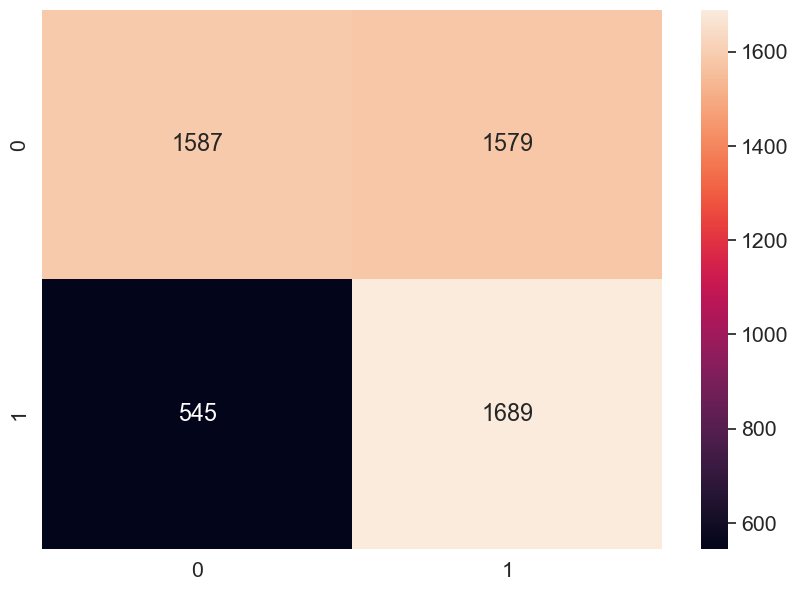

In [193]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [194]:
# Analyzing Coefficient

In [195]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
           axis = 1)

,features,coef
0,age,-0.146454
1,deposits,0.506558
2,withdrawal,0.042337
3,purchases_partners,-0.721165
4,purchases,-0.650080
5,cc_taken,0.064543
6,cc_recommended,0.089376
7,web_user,0.154611
8,ios_user,0.068847
9,registered_phones,0.116075


In [196]:
# Final Results

In [197]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()

In [198]:
final_results['Predicted_Churn'] = y_pred

In [199]:
final_results = final_results[['user', 'churn', 'Predicted_Churn']].reset_index(drop=True)

In [200]:
final_results

,user,churn,Predicted_Churn
0,53016,1.0,1
1,54963,0.0,0
2,10511,0.0,0
3,64269,0.0,1
4,30978,0.0,0
...,...,...,...
5395,50513,1.0,1
5396,42775,0.0,1
5397,15284,1.0,1
5398,10432,1.0,0
